### Task 1: Binary sanity + OOB check (Two Moons)

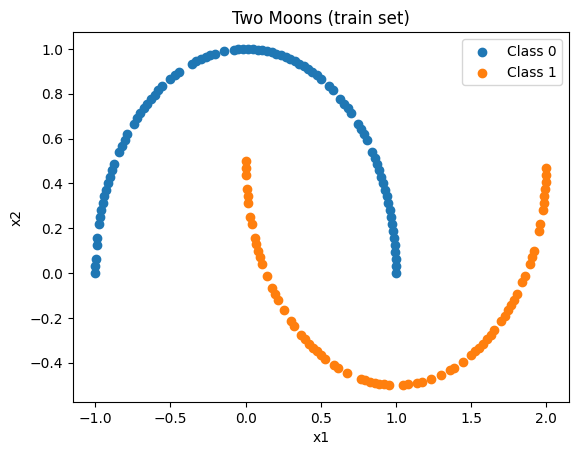

In [ ]:
import numpy as np
from sklearn.datasets import make_moons

from mlscratch.utils import train_test_split
n_data = 200
X, y = make_moons(n_data)

X_train, X_test, y_train, y_test = train_test_split(X, y)

from matplotlib import pyplot as plt

for label in np.unique(y_train):
    plt.scatter(
        X_train[y_train == label, 0],
        X_train[y_train == label, 1],
        label=f"Class {label}"
    )
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Two Moons (train set)")
plt.show()

In [31]:
%load_ext autoreload
%autoreload 2

from mlscratch.random_forest import RandomForestClassifier
import pandas as pd

n_estimators_list = [1, 3, 10, 50, 200]
result = []
for n_estimators in n_estimators_list:
    for max_features in ['sqrt']:
        model = RandomForestClassifier(n_estimators=n_estimators,
                                       max_features= max_features,
                                       oob_score = True,
                                       bootstrap = True)
        model.fit(X_train, y_train)
        oob_score = model.oob_score_
        test_score = model.score(X_test, y_test)
        oob_coverage = model.oob_coverage_
        result.append([n_estimators, max_features, oob_score, test_score, oob_coverage])

df = pd.DataFrame(result, columns=["n_estimators", "max_features", "OOB acc", "Test acc", "OOB coverage"])
print(df)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
   n_estimators max_features   OOB acc  Test acc  OOB coverage
0             1         sqrt  0.950000      1.00       0.37500
1             3         sqrt  0.934426      0.95       0.76250
2            10         sqrt  0.967742      1.00       0.96875
3            50         sqrt  0.993750      1.00       1.00000
4           200         sqrt  0.993750      1.00       1.00000


#### Summary
- Two moons is a easy dataset, even shallow trees sparate classes nearly perfectly
- The Random Forest averages out noise - explains the high accuracy
- Coverage behavior confirms 

### Task 2: Inbalanced 3-classes

{np.int64(0): np.int64(496), np.int64(5): np.int64(399), np.int64(8): np.int64(105)}


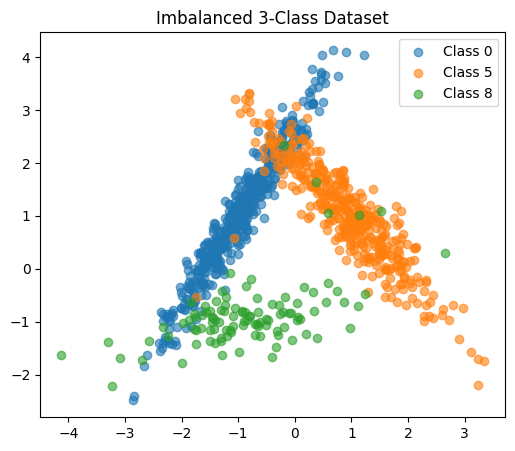

In [50]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate imbalanced 3-class dataset
X, y = make_classification(
    n_samples=1000,      # total samples
    n_features=2,        # 2D for easy plotting
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.5, 0.4, 0.1],   # imbalance here
    random_state=42
)
mapping = {0: 0, 1: 5, 2: 8}
y = np.vectorize(mapping.get)(y)

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

# Plot
plt.figure(figsize=(6, 5))
for class_label in np.unique(y):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], 
                label=f"Class {class_label}", alpha=0.6)
plt.legend()
plt.title("Imbalanced 3-Class Dataset")
plt.show()


In [51]:
n_estimators = 5
X_train, y_train, X_test, y_test = train_test_split(X, y)

model = RandomForestClassifier(n_estimators)
model.fit(X_train, y_train)
p = model.predict_proba(X_test)
y_test_hat = model.predict(X_test)


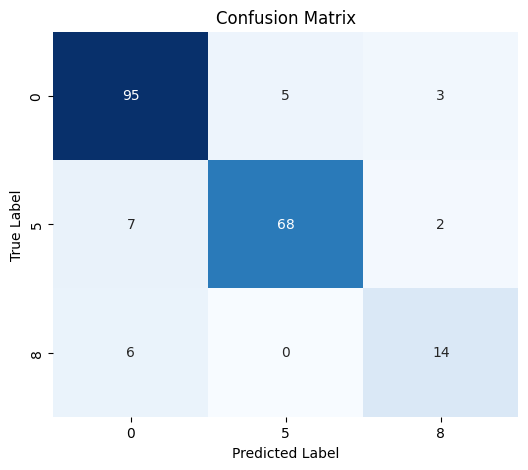

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


cm = confusion_matrix(y_test, y_test_hat)
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [56]:
report = classification_report(y_test, y_test_hat)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       103
           5       0.93      0.88      0.91        77
           8       0.74      0.70      0.72        20

    accuracy                           0.89       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.89      0.89      0.88       200



- Model struggles in class '8' due to lack of datapoint